# VORES TITEL

**Motivation for our model project**

In our model project we will begin with describing and solving the basic solow model. 

Imports and set magics:

In [1]:
## Importing necessary libraries
import numpy as np
import sympy as sm
from scipy import optimize
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

## For better looking output
sm.init_printing(use_unicode=True)

## Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# The basic Solow model

$$
\begin{align}
Y_t=BK_t^{\alpha}L_t^{1-\alpha} \tag{1} \\
r_t=\alpha B\left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{2} \\
w_t=(1-\alpha) B\left(\frac{K_t}{L_t}\right)^{\alpha} \tag{3} \\
S_t=sY_t \tag{4} \\
K_{t+1}-K_t=S_t-\delta K_t \tag{5} \\
L_{t+1}=(1+n)L_t \tag{6} \\
\end{align}
$$

Where we use the per. capita notation, $y_t=\frac{Y_t}{L_t}$ and $k_t=\frac{K_t}{L_t}$

## Analytical Solution

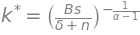

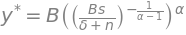

In [2]:
# Define symbols
n, s, B, k, kstar, ystar, alpha, delta = sm.symbols('n s B k k^* y^* alpha delta')

# Solow Equation for k
Solow_eq = sm.Eq(((s * B * k**alpha - (n + delta) * k) / (1 + n)), 0)

# Calculate steady-state value of k
k_ss = sm.solve(Solow_eq, k)[0]
steady_state_k = sm.Eq(kstar, k_ss)

# Calculate steady-state value of y
y = B * k**alpha
y_ss = y.subs(k, k_ss)
steady_state_y = sm.Eq(ystar, y_ss)

# Print the steady-state equations for k and y
display(steady_state_k)
display(steady_state_y)

So we see that the steady state value for capital per worker, $k^*$ and $y^*$, written more elegantly, is given as:

$k^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{1}{1-\alpha}}$

$y^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{\alpha}{1-\alpha}}$



In [3]:
# Convert the symbolic steady-state k solution into a Python function
k_ss_function = sm.lambdify((alpha, delta, B, n, s), k_ss)

Now, k_ss_function can be called with specific values for alpha, delta, B, n, and s.

We now move into defining reasonable parameters in our model, and printing the related values of $k^*$ and $y^*$

In [4]:
# Define model parameters using plausible empirical values
alpha = 1/3
n = 0.02
s = 0.35
B = 1
delta = 0.05

In [5]:
# Compute the steady-state value for k using the parameter values
k_ss_value = k_ss_function(alpha, delta, B, n, s)

# Create and display the equation for the steady-state k with the computed value
steady_state_k_value = sm.Eq(kstar, k_ss_value)
sm.pprint(steady_state_k_value)

k__* = 11.1803398874989


In [6]:
# Compute the steady-state value for y using the steady-state k value
y_ss_value = B * k_ss_value**alpha

# Create the equation for the steady-state y with the computed value
steady_state_y_equation = sm.Eq(ystar, y_ss_value)
sm.pprint(steady_state_y_equation)

y__* = 2.23606797749979


## Numerical Solution

In [11]:
def solow_steady_state_k(n: float, s: float, B: float, alpha: float, delta: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Output elasticity wrt capital
    delta: Physical capital depreciation rate
    s    : savings rate
    n    : Population growth
    B    : Productivity parameter
    """
    solow_equation = lambda k: s * B * k**alpha - (n + delta) * k
    
    return optimize.bisect(solow_equation, 1, 100)

k_star = solow_steady_state_k(n, s, B, alpha, delta)
print(f'k* = {k_star:.3f}')

k* = 11.180


The solution is equal to the analytical solution, which implies that the $k^*$ and $y^*$ have the same computed values.

We are now going to graphical visualize the solow diagram.

In [21]:
def plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float):
    k_growth = [s * B * t**alpha for t in range(kt_xmax + 1)]
    diagonal = [(n + delta) * t for t in range(kt_xmax + 1)]

    k_star = ((s*B)/(n+delta))**(1/(1-alpha))

    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(8, 6))
    plt.plot(k_growth, label=r'$sBk_t^{\alpha}$', color='darkorange')
    plt.plot(diagonal, label=r'$(n+\delta)k_t$', color='black')
    plt.axvline(x=k_star, linestyle='--', color='red', label=r'$k*$')
    plt.axvline(x=kt_vline, linestyle='--', color='green', label=r'$k_t$')
    plt.xlim(0, kt_xmax)
    plt.xlabel('Capital per capita, $k_t$')
    plt.ylabel('')
    plt.legend()
    plt.title('Solow Diagram')
    plt.grid(True)  # add grid
    
# Add arrows
    arrow_len = abs(k_star - kt_vline)
    arrow_positions = [0.3, 0.6, 0.8, 0.9, 0.95, 1]
    
    if kt_vline < k_star:
        arrow_len = -arrow_len
        arrow_positions = [1 - pos for pos in arrow_positions]
    else:
        arrow_positions = [1 - pos for pos in arrow_positions]
    
    arrow_center = min(k_star, kt_vline) + abs(arrow_len) / 2
    
    for pos in arrow_positions:
        arrow_x = arrow_center + arrow_len * (pos - 0.5)
        plt.annotate(
            '',
            xy=(kt_vline, 0), xycoords='data',
            xytext=(arrow_x, 0), textcoords='data',
            arrowprops=dict(
                arrowstyle="<-", color="black", lw=1, mutation_scale=15
            )
        )

    plt.show()

widgets.interact(
    plot_solow_diagram,
    k=widgets.fixed(0),
    alpha=widgets.FloatSlider(description=r'α', min=0, max=0.9, step=0.05, value=0.3, layout=widgets.Layout(width='50%')),
    delta=widgets.FloatSlider(description=r'δ', min=0, max=0.1, step=0.01, value=0.01, layout=widgets.Layout(width='50%')),
    s=widgets.FloatSlider(description='s', min=0.01, max=0.8, step=0.05, value=0.4, layout=widgets.Layout(width='50%')),
    n=widgets.FloatSlider(description='n', min=0.01, max=0.1, step=0.005, value=0.01, layout=widgets.Layout(width='50%')),
    B=widgets.fixed(1),
    kt_xmax=widgets.IntSlider(description='k_t axis', min=1, max=100, step=10, value=100, layout=widgets.Layout(width='50%')),
    kt_vline=widgets.FloatSlider(description='k_t', min=0, max=100, step=0.1, value=20, layout=widgets.Layout(width='50%'))
)


interactive(children=(FloatSlider(value=0.01, description='n', layout=Layout(width='50%'), max=0.1, min=0.01, …

<function __main__.plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float)>

Blalbalba om solow diagram.

Moving forward to an extended version of the basic solow, now moving into a genereal solow model with human capital.

## Solow model with human capital

\begin{align}
Y_t&=K_t^\alpha H_t^{\varphi}\left(A_t L_t\right)^{1-\alpha-\varphi}, \tag{7} \\
r_t&=\alpha\left(\frac{K_t}{A_t L_t}\right)^{\alpha-1}\left(\frac{H_t}{A_t L_t}\right)^{\varphi}, \tag{8} \\
w_t&=(1-\alpha)\left(\frac{K_t}{A_t L_t}\right)^\alpha\left(\frac{H_t}{A_t L_t}\right)^{\varphi} A_t, \tag{9} \\
K_{t+1}-K_t&=s_K Y_t-\delta K_t, \tag{10} \\
H_{t+1}-H_t&=s_H Y_t-\delta H_t, \tag{11} \\
L_{t+1}&=(1+n) L_t, \tag{12} \\
A_{t+1}&=(1+g) A_t . \tag{13}
\end{align}


Where $\tilde k = \frac{K_t}{A_tL_t}$

**Tekst om hvad der egentlig står der**

In [ ]:
#We define all symbols
k = sm.symbols('k') #physical capital
ktildestar = sm.symbols('ktilde^*') #physical capital
ktilde = sm.symbols('ktilde') #physical capital per effective worker
htilde = sm.symbols('htilde') #human capital per effective worker
htildestar = sm.symbols('htilde^*') #Steady state human capital
h = sm.symbols('h') #human capital
alpha = sm.symbols('alpha') #return on physical capital
phi = sm.symbols('phi') #return on human capital
delta = sm.symbols('delta') #depreciation rate on capital
sh = sm.symbols('sh') #savings/investment rate in human capital
sk = sm.symbols('sk') #savings/investment rate in physical capital
g = sm.symbols('g') #growth in technology
n = sm.symbols('n') #growth in labour force

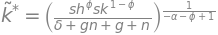

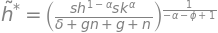

In [ ]:
# Define the steady state equations
def solow_ktilde_eq(ktilde, htilde, sk, sh, alpha, phi, n, g, delta):
    return (sk * np.power(ktilde, alpha) * np.power(htilde, phi) - (n + g + delta + n * g) * ktilde)

def solow_htilde_eq(ktilde, htilde, sk, sh, alpha, phi, n, g, delta):
    return (sh * np.power(ktilde, alpha) * np.power(htilde, phi) - (n + g + delta + n * g) * htilde)
# Define the steady state expressions for ktilde and htilde
ktilde_ss_expr = (sk**(1-phi) * sh**phi / (n + g + delta + n * g))**(1/(1 - alpha - phi))
htilde_ss_expr = (sk**alpha * sh**(1-alpha) / (n + g + delta + n * g))**(1/(1 - alpha - phi))

steady_state_ktilde = sm.Eq(ktildestar, ktilde_ss_expr)
steady_state_htilde = sm.Eq(htildestar, htilde_ss_expr)



display(steady_state_ktilde, steady_state_htilde)


In [ ]:
# Set the values for the parameters
sk_val = 0.4
sh_val = 0.3
alpha_val = 0.4
phi_val = 0.3
n_val = 0.02
g_val = 0.2
delta_val = 0.05

# Define the equations with the given values for the parameters
eq1 = lambda x: solow_ktilde_eq(x[0], x[1], sk_val, sh_val, alpha_val, phi_val, n_val, g_val, delta_val)
eq2 = lambda x: solow_htilde_eq(x[0], x[1], sk_val, sh_val, alpha_val, phi_val, n_val, g_val, delta_val)

# Initial guess for the solver
x0 = np.array([1, 1])

# Solve the equations
solution = optimize.fsolve(lambda x: [eq1(x), eq2(x)], x0)

# Display the steady-state values of ktilde and htilde
ktilde_ss, htilde_ss = solution
display((ktilde_ss, htilde_ss))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_combinations(sk, sh, alpha, phi, n, g, delta):
    ktilde_ss = ((sk ** (1 - phi) * sh ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htilde_ss = ((sk ** alpha * sh ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    
    ktilde_values = np.linspace(0.01, 2 * ktilde_ss, 100)
    htilde_values = np.linspace(0.01, 2 * htilde_ss, 100)
    
    Ktilde, Htilde = np.meshgrid(ktilde_values, htilde_values)
    
    delta_ktilde = (1 / ((1 + n) * (1 + g))) * (sk * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Ktilde)
    delta_htilde = (1 / ((1 + n) * (1 + g))) * (sh * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)
    
    plt.figure(figsize=(8, 8))
    plt.contour(Ktilde, Htilde, delta_ktilde, levels=[0], colors='blue', label=r'$\Delta\tilde{k}=0$')
    plt.contour(Ktilde, Htilde, delta_htilde, levels=[0], colors='red', label=r'$\Delta\tilde{h}=0$')
    
    plt.scatter(ktilde_ss, htilde_ss, color='green', marker='o', zorder=3)
    plt.annotate("E", (ktilde_ss, htilde_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)
    
    plt.xlabel('$\~{k}_t$')
    plt.ylabel('$\~{h}_t$')
    plt.title('Figure x: Steady state combinations')
    
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    
    plt.legend(['$\Delta \~{k} = 0$', '$\Delta \~{h} = 0$'], loc='center left')
    plt.grid()
    plt.show()

# Create sliders for each parameter
sk_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r'$s_K$')
sh_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r'$s_H$')
alpha_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'$\alpha$')
phi_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'$\varphi$')
n_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.01, description=r'$n$')
g_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.02, description=r'$g$')
delta_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.05, description=r'$\delta$')

# Create an interactive plot
interact(plot_combinations, sk=sk_slider, sh=sh_slider, alpha=alpha_slider, phi=phi_slider, n=n_slider, g=g_slider, delta=delta_slider);


interactive(children=(FloatSlider(value=0.3, description='$s_K$', max=0.9, min=0.1, step=0.01), FloatSlider(va…

**Figure x** has physical capital per effecctive worker along the x-axia and human capital per effective worker along the y-axis. The red curve represents the combinations of the two there $\Delta\tilde h_t=0$, and the blue curve represents the combinations for which $\Delta\tilde k_t=0$.

In the intersection of the two curves, both changes are equal to zero, implying a steady state combination. This is displayed at the green dot "E" in the plot.

For every combination that lies the red blue, there will be $\tilde k_{t+1} - \tilde k_t>0$ implying a positive growth in physical capital per effective worker, and opposite for when we are below.

### Policy Experiment

In [ ]:
#The initial values of our variables are defined
A0, K0, H0, L0, Y0 = 1, 1, 1, 1, 1


#We define the functions using variables for the first period
Lt = (1+n)*L0
Yt = K0**alpha*H0**phi*A0**(1-alpha-phi)

#An empty list is made
growthyt = []

for i in range(200):
    #A permanent shock to sh from period 2
    if i <= 1:
        sh = 0.1
    else:
        sh = 0.2
        
    #Y function in previous period
    Ytm1 = Yt
    
    #L function in previous period
    Ltm1 = Lt
    
    #y function in previous period
    ytm1 = 0
    ytm1 = Ytm1/Ltm1
    
    #K function in current period 
    Kt=sk*Ytm1+(1-delta)*K0
    K0=Kt
    
    #H function in current period
    Ht = sh*Ytm1+(1-delta)*H0
    H0=Ht
    
    #A function in current period
    At = (1+g)*A0
    A0=At
    
    #L function in current period
    Lt = (1+n)*L0
    L0=Lt
    
    #Y function in current period
    Yt=Kt**alpha*Ht**phi*At**(1-alpha-phi)
    
    #y function in current period
    yt = Yt/Lt
    
    #We calculate the growth in yt using log
    growthyt.append(np.log(yt)-np.log(ytm1))

#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)



#We discard the first growth rate since ytm1 doesn't have a well defined value for period 0
ax.plot(growthyt[1:], color='#076e62')

plt.axhline(growthyt[199],xmax=1,color='gray',linestyle='--')

ax.set_xlabel(r'time')
ax.set_ylabel(r'growth in $y_t$')
ax.set_title('Growth in $y_t$ with a permanent positive shock in $s_H$');

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable log method